## Getting Started

First let's import all the headers we'll need for this excercise.

In [2]:
import torch
import matplotlib.pyplot as plt

from torch import nn

## Linear Regression

Let's first try and approximate some linear function that fits the equation `y = mx + b`.

We'll arbitrarily choose `m = 6` and `b = 8` for this exercise.
Let's generate some training data that somewhat closely fits this line. We'll introduce some Gaussian noise to add some jitter.

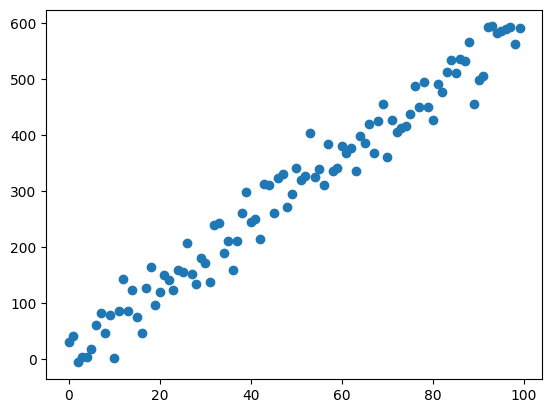

In [6]:
m = 6
b = 8

num_samples = 100
spread = 30

x = torch.arange(num_samples).float()
rand_b = b + torch.randn(num_samples) * spread

y = m * x + rand_b

plt.scatter(x, y)

Cool. We can probably already expect what the line should look like when we train the model. Let's do this by only using a linear layer (since we're currently just looking for the best fit line).

Epoch 0 - Loss: 0.5183892250061035
Epoch 10 - Loss: 0.35827523469924927
Epoch 20 - Loss: 0.2509448826313019
Epoch 30 - Loss: 0.17899729311466217
Epoch 40 - Loss: 0.13076823949813843
Epoch 50 - Loss: 0.09843847155570984
Epoch 60 - Loss: 0.07676660269498825
Epoch 70 - Loss: 0.06223919987678528
Epoch 80 - Loss: 0.052500899881124496
Epoch 90 - Loss: 0.04597298055887222
Epoch 100 - Loss: 0.04159706085920334
Epoch 110 - Loss: 0.03866370767354965
Epoch 120 - Loss: 0.0366973914206028
Epoch 130 - Loss: 0.03537929803133011
Epoch 140 - Loss: 0.03449571877717972
Epoch 150 - Loss: 0.03390342742204666
Epoch 160 - Loss: 0.03350638970732689
Epoch 170 - Loss: 0.033240243792533875
Epoch 180 - Loss: 0.03306183964014053
Epoch 190 - Loss: 0.032942239195108414
Predicted m: 5.789618492126465
Predicted b: 15.663116455078125


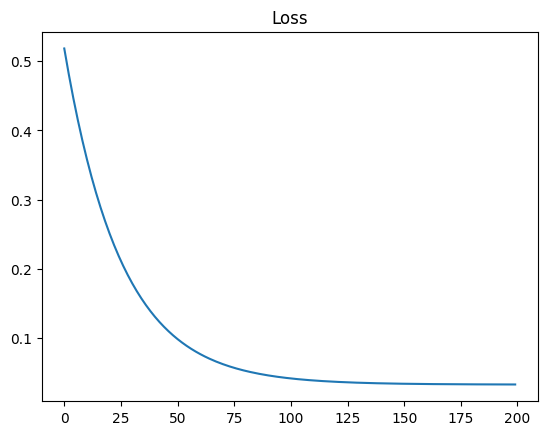

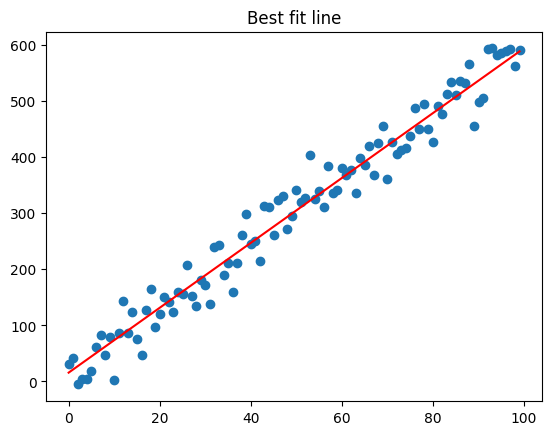

In [42]:
def train_linear(x, y):
    epochs = 200
    learning_rate = 0.01

    model = nn.Linear(1, 1)
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # Normalize the data.
    # This helps training as the model doesn't have to deal with large numbers.
    x_mean, x_std = x.mean(), x.std()
    y_mean, y_std = y.mean(), y.std()

    x = (x - x_mean) / x_std
    y = (y - y_mean) / y_std

    inputs = x.reshape(100, 1)
    labels = y.reshape(100, 1)

    losses = []
    for epoch in range(epochs):
        prediction = model(inputs)
        loss = criterion(prediction, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if epoch % 10 == 0:
            print(f'Epoch {epoch} - Loss: {loss.item()}')

    # De-normalize the data
    x = x * x_std + x_mean
    y = y * y_std + y_mean
    prediction = prediction * y_std + y_mean

    # De-normalize the weights and biases
    pred_m = model.weight * y_std / x_std
    pred_b = model.bias * y_std + y_mean - pred_m * x_mean

    print(f'Predicted m: {pred_m.item()}')
    print(f'Predicted b: {pred_b.item()}')

    # Plot the loss in
    plt.plot(losses, label='Loss')
    plt.title('Loss')
    plt.show()

    # Plot the best fit line along with the data
    plt.scatter(x, y, label='Data')
    plt.plot(x, prediction.detach().numpy(), label='Best fit line', color='red')
    plt.title('Best fit line')
    plt.show()

train_linear(x, y)

Nice! We can see that the red line fits the data reasonably well. Our original function had `m = 6` and `b = 8`. Even though our `predicted m` and `predicted b` values aren't exact because of the noise we added, we can see that they're pretty close! Note that these values might change depending on how the model is initialized but we can generally expect it to fit somewhat close to that.

## Non-Linear Regression

Now let's see what happens when we try to model a function that isn't linear. We'll used `y = sin(x)` as our function of choice here. Normally you wouldn't know the function, but this is just so we can generate some known data.

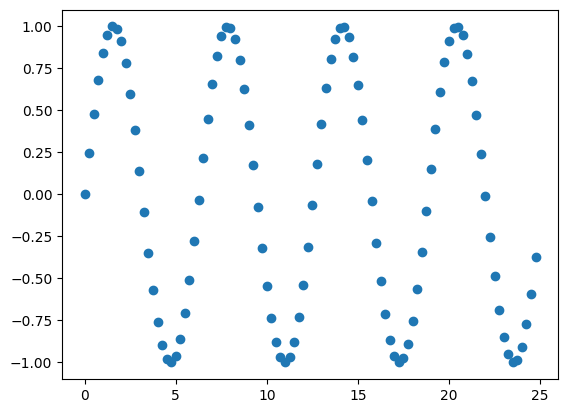

In [44]:
sin_x = torch.arange(0, 25, 0.25).float()
sin_y = torch.sin(sin_x)

plt.scatter(sin_x, sin_y)

Let's see what happens when we first try using a linear function to approximate our sine distribution.

Hmm, we can see that our training loss did converge, but we can clearly see that a straight line is not sufficient to truly represent this data. This is where non-linearities come in. In order to create curves/curve-like functions we can approximate it with many tiny linear layers. This is where neural networks come in.

Neural networks consists of neurons -- things that take in an input manipulate it with some function. Multi Layer Perceptrons (MLPs) are one type of neural networks. They take in an input, apply a linear function to it (similar to above), but then also apply a non-linearity to them. This happens many times based on the size of the network, which is determined by the number of layers.

The neural network we will define will have an input layer, and output later and two hidden layers.

Epoch 0 - Loss: 0.9744930267333984
Epoch 10 - Loss: 0.9707294702529907
Epoch 20 - Loss: 0.9670617580413818
Epoch 30 - Loss: 0.9649220108985901
Epoch 40 - Loss: 0.9635462760925293
Epoch 50 - Loss: 0.9623367786407471
Epoch 60 - Loss: 0.9612184762954712
Epoch 70 - Loss: 0.9600780010223389
Epoch 80 - Loss: 0.9589595198631287
Epoch 90 - Loss: 0.9578244090080261
Epoch 100 - Loss: 0.9567599296569824
Epoch 110 - Loss: 0.9556537866592407
Epoch 120 - Loss: 0.9544366598129272
Epoch 130 - Loss: 0.9531151056289673
Epoch 140 - Loss: 0.9517784714698792
Epoch 150 - Loss: 0.950469970703125
Epoch 160 - Loss: 0.9492897987365723
Epoch 170 - Loss: 0.9482740759849548
Epoch 180 - Loss: 0.9474124312400818
Epoch 190 - Loss: 0.9467010498046875
Epoch 200 - Loss: 0.9461001753807068
Epoch 210 - Loss: 0.9455386400222778
Epoch 220 - Loss: 0.9449912905693054
Epoch 230 - Loss: 0.9444501399993896
Epoch 240 - Loss: 0.943916916847229
Epoch 250 - Loss: 0.9433915019035339
Epoch 260 - Loss: 0.9428721070289612
Epoch 270 - Lo

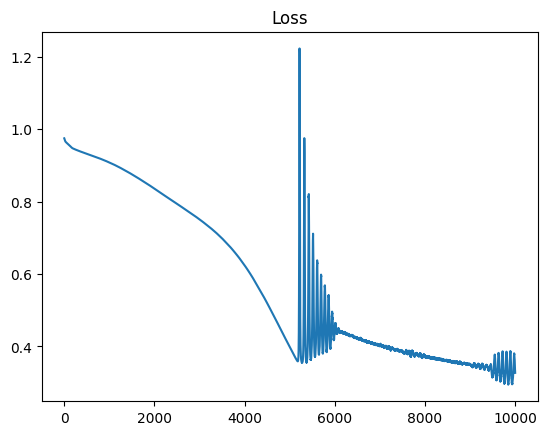

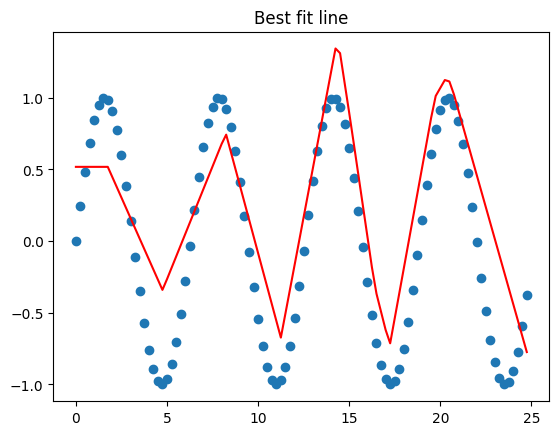

Epoch 0 - Loss: 1.0572854280471802
Epoch 10 - Loss: 0.9751296043395996
Epoch 20 - Loss: 0.9578509330749512
Epoch 30 - Loss: 0.9516482353210449
Epoch 40 - Loss: 0.9482985734939575
Epoch 50 - Loss: 0.9459065198898315
Epoch 60 - Loss: 0.9440111517906189
Epoch 70 - Loss: 0.9423801898956299
Epoch 80 - Loss: 0.9408756494522095
Epoch 90 - Loss: 0.9394257068634033
Epoch 100 - Loss: 0.9380108118057251
Epoch 110 - Loss: 0.9366515874862671
Epoch 120 - Loss: 0.9353146553039551
Epoch 130 - Loss: 0.9340090751647949
Epoch 140 - Loss: 0.932709813117981
Epoch 150 - Loss: 0.9314152598381042
Epoch 160 - Loss: 0.9301354885101318
Epoch 170 - Loss: 0.9288682341575623
Epoch 180 - Loss: 0.9276022911071777
Epoch 190 - Loss: 0.9263362288475037
Epoch 200 - Loss: 0.9250679016113281
Epoch 210 - Loss: 0.923798143863678
Epoch 220 - Loss: 0.922539472579956
Epoch 230 - Loss: 0.9212831854820251
Epoch 240 - Loss: 0.9200251698493958
Epoch 250 - Loss: 0.9187567830085754
Epoch 260 - Loss: 0.9174854755401611
Epoch 270 - Los

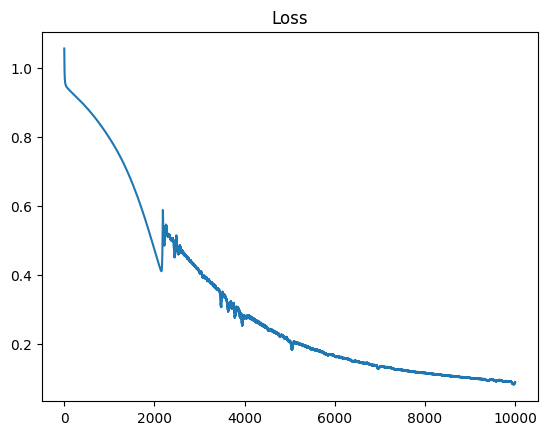

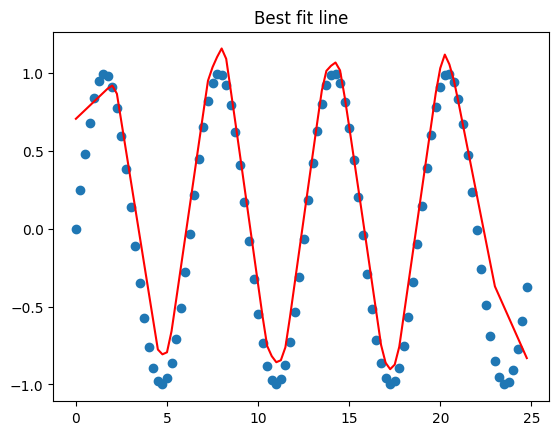

Epoch 0 - Loss: 0.9982700347900391
Epoch 10 - Loss: 0.9313713908195496
Epoch 20 - Loss: 0.9141854643821716
Epoch 30 - Loss: 0.901818037033081
Epoch 40 - Loss: 0.8914246559143066
Epoch 50 - Loss: 0.8823195695877075
Epoch 60 - Loss: 0.8740474581718445
Epoch 70 - Loss: 0.8663105964660645
Epoch 80 - Loss: 0.8589507341384888
Epoch 90 - Loss: 0.8518725037574768
Epoch 100 - Loss: 0.8450126647949219
Epoch 110 - Loss: 0.8382719159126282
Epoch 120 - Loss: 0.8315986394882202
Epoch 130 - Loss: 0.825253963470459
Epoch 140 - Loss: 0.8208839893341064
Epoch 150 - Loss: 0.8360432386398315
Epoch 160 - Loss: 0.9960717558860779
Epoch 170 - Loss: 0.8683101534843445
Epoch 180 - Loss: 0.8080492615699768
Epoch 190 - Loss: 0.7957646250724792
Epoch 200 - Loss: 0.791645884513855
Epoch 210 - Loss: 0.8093229532241821
Epoch 220 - Loss: 0.9378798604011536
Epoch 230 - Loss: 0.850655734539032
Epoch 240 - Loss: 0.7877056002616882
Epoch 250 - Loss: 0.7764918804168701
Epoch 260 - Loss: 0.7964645624160767
Epoch 270 - Loss

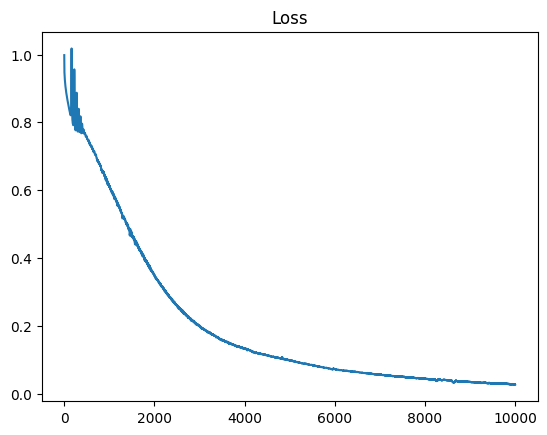

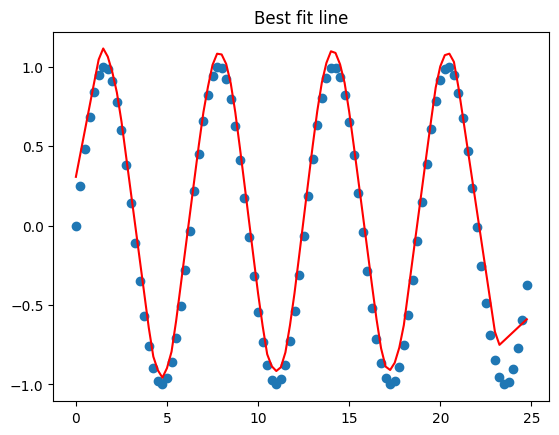

In [46]:
class NeuralNetwork(nn.Module):
    def __init__(self, num_hidden_layers):
        super(NeuralNetwork, self).__init__()

        self.layers = nn.Sequential(
            nn.Linear(1, num_hidden_layers),
            nn.ReLU(),
            nn.Linear(num_hidden_layers, num_hidden_layers),
            nn.ReLU(),
            nn.Linear(num_hidden_layers, 1),
        )

    def forward(self, x):
        return self.layers(x)


def train_neural_network(x, y, num_hidden_layers):
    epochs = 10000
    learning_rate = 0.01

    model = NeuralNetwork(num_hidden_layers)
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # Normalize the data.
    # This helps training as the model doesn't have to deal with large numbers.
    x_mean, x_std = x.mean(), x.std()
    y_mean, y_std = y.mean(), y.std()

    x = (x - x_mean) / x_std
    y = (y - y_mean) / y_std

    inputs = x.reshape(100, 1)
    labels = y.reshape(100, 1)

    losses = []
    for epoch in range(epochs):
        prediction = model(inputs)
        loss = criterion(prediction, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if epoch % 10 == 0:
            print(f'Epoch {epoch} - Loss: {loss.item()}')

    # De-normalize the data
    x = x * x_std + x_mean
    y = y * y_std + y_mean
    prediction = prediction * y_std + y_mean

    # Plot the loss in
    plt.plot(losses, label='Loss')
    plt.title('Loss')
    plt.show()

    # Plot the best fit line along with the data
    plt.scatter(x, y, label='Data')
    plt.plot(x, prediction.detach().numpy(), label='Best fit line', color='red')
    plt.title('Best fit line')
    plt.show()

train_neural_network(sin_x, sin_y, 10)
train_neural_network(sin_x, sin_y, 100)
train_neural_network(sin_x, sin_y, 1000)

Above we can see some Neural Networks, specifically Multi-Layer Perceptrons (MLP), of different sizes. We can see the larger ones being more accurate but you trade off on training time and memory usage as a result.

Other things we can notice, is that it does take much longer converge. The linear example above converges around 200 epochs, these MLPs took about 10000 epochs.

## Optimizers

Above we saw that training an MLP took far more epochs than training a linear layer. Above we used an optimizer called "Stochastic Gradient Descent" or SGD for short. Optimizers basically determine how much to update the weights the model is trying to learn. A good choice for optimizers can help both accuracy and training time, or potentially trade one for the other. It often ends up being a decision for the developer to pick which one.

One of the most popular optimizers and a good default is called Adam that we will try below. We'll define the exact same function above, but this time we'll replace the SGD optimizer with the Adam optimizer.

Epoch 0 - Loss: 1.0145434141159058
Epoch 10 - Loss: 0.9429244995117188
Epoch 20 - Loss: 0.931962788105011
Epoch 30 - Loss: 0.9140787720680237
Epoch 40 - Loss: 0.8860915899276733
Epoch 50 - Loss: 0.8399677872657776
Epoch 60 - Loss: 0.7693604826927185
Epoch 70 - Loss: 0.6822084784507751
Epoch 80 - Loss: 0.6033955812454224
Epoch 90 - Loss: 0.548452615737915
Epoch 100 - Loss: 0.5147406458854675
Epoch 110 - Loss: 0.49128422141075134
Epoch 120 - Loss: 0.4737423062324524
Epoch 130 - Loss: 0.46207165718078613
Epoch 140 - Loss: 0.4540901184082031
Epoch 150 - Loss: 0.4498244822025299
Epoch 160 - Loss: 0.4456791281700134
Epoch 170 - Loss: 0.44334933161735535
Epoch 180 - Loss: 0.44177570939064026
Epoch 190 - Loss: 0.44089236855506897
Epoch 200 - Loss: 0.44008868932724
Epoch 210 - Loss: 0.4392138719558716
Epoch 220 - Loss: 0.4388718008995056
Epoch 230 - Loss: 0.43829792737960815
Epoch 240 - Loss: 0.43844833970069885
Epoch 250 - Loss: 0.43819206953048706
Epoch 260 - Loss: 0.4378880262374878
Epoch 27

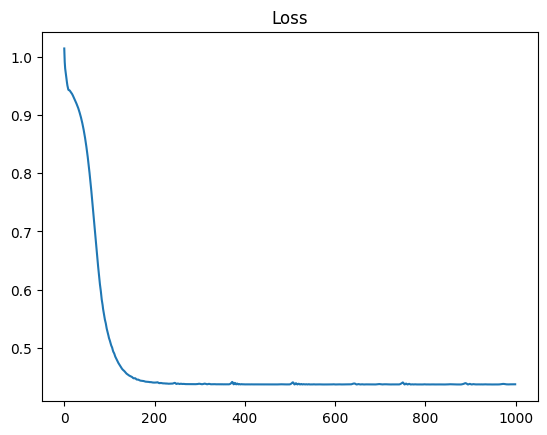

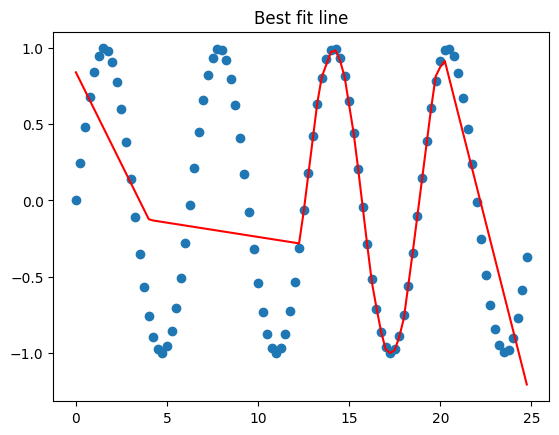

Epoch 0 - Loss: 1.025638461112976
Epoch 10 - Loss: 0.919350802898407
Epoch 20 - Loss: 0.8454849123954773
Epoch 30 - Loss: 0.7636260986328125
Epoch 40 - Loss: 0.701427698135376
Epoch 50 - Loss: 0.5956230759620667
Epoch 60 - Loss: 0.4736102223396301
Epoch 70 - Loss: 0.37105101346969604
Epoch 80 - Loss: 0.26357078552246094
Epoch 90 - Loss: 0.18095076084136963
Epoch 100 - Loss: 0.12130138278007507
Epoch 110 - Loss: 0.11818292737007141
Epoch 120 - Loss: 0.0677892342209816
Epoch 130 - Loss: 0.055917926132678986
Epoch 140 - Loss: 0.04431445524096489
Epoch 150 - Loss: 0.03985051065683365
Epoch 160 - Loss: 0.0345880351960659
Epoch 170 - Loss: 0.042426947504282
Epoch 180 - Loss: 0.026974977925419807
Epoch 190 - Loss: 0.02145748771727085
Epoch 200 - Loss: 0.019001111388206482
Epoch 210 - Loss: 0.015423712320625782
Epoch 220 - Loss: 0.03339549899101257
Epoch 230 - Loss: 0.047767166048288345
Epoch 240 - Loss: 0.03637302294373512
Epoch 250 - Loss: 0.01313403993844986
Epoch 260 - Loss: 0.013120534829

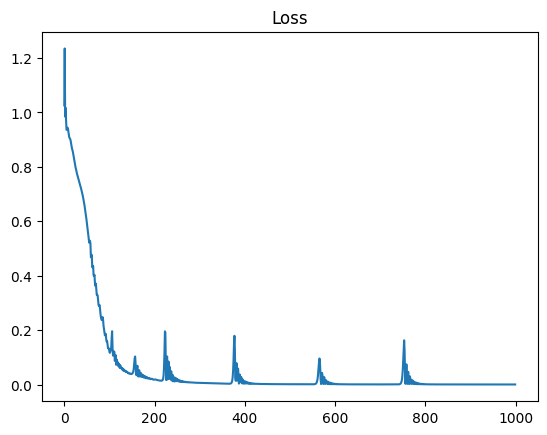

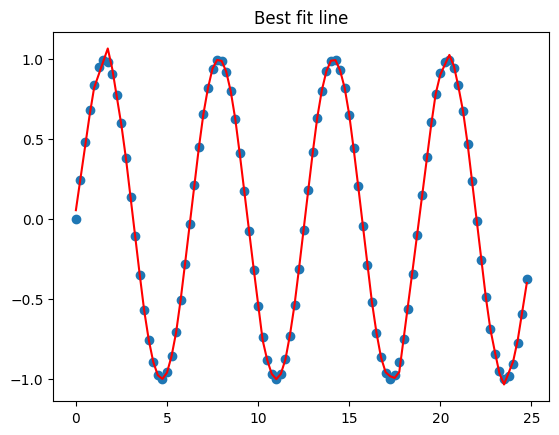

Epoch 0 - Loss: 1.013384222984314
Epoch 10 - Loss: 1.308333158493042
Epoch 20 - Loss: 1.124063491821289
Epoch 30 - Loss: 0.8327009081840515
Epoch 40 - Loss: 0.7490988969802856
Epoch 50 - Loss: 0.6684455871582031
Epoch 60 - Loss: 0.6098607778549194
Epoch 70 - Loss: 0.5552479028701782
Epoch 80 - Loss: 0.5658835172653198
Epoch 90 - Loss: 0.45594868063926697
Epoch 100 - Loss: 0.4602389633655548
Epoch 110 - Loss: 0.4614986479282379
Epoch 120 - Loss: 0.3501233756542206
Epoch 130 - Loss: 0.36675137281417847
Epoch 140 - Loss: 0.3310298025608063
Epoch 150 - Loss: 0.5883751511573792
Epoch 160 - Loss: 0.22766965627670288
Epoch 170 - Loss: 0.19021204113960266
Epoch 180 - Loss: 0.156788170337677
Epoch 190 - Loss: 1.5875239372253418
Epoch 200 - Loss: 0.1821874976158142
Epoch 210 - Loss: 0.14031612873077393
Epoch 220 - Loss: 0.1294478178024292
Epoch 230 - Loss: 0.0827924907207489
Epoch 240 - Loss: 0.06329324841499329
Epoch 250 - Loss: 0.050941623747348785
Epoch 260 - Loss: 0.04066910222172737
Epoch 2

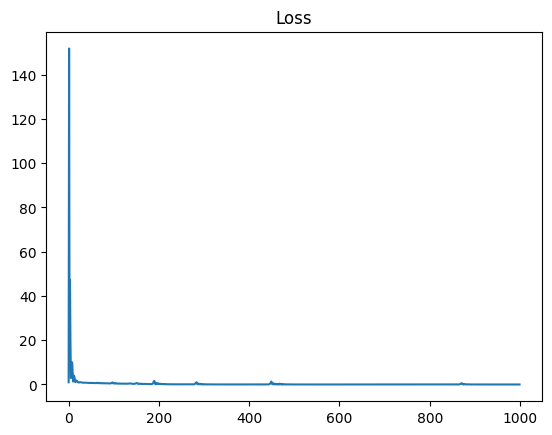

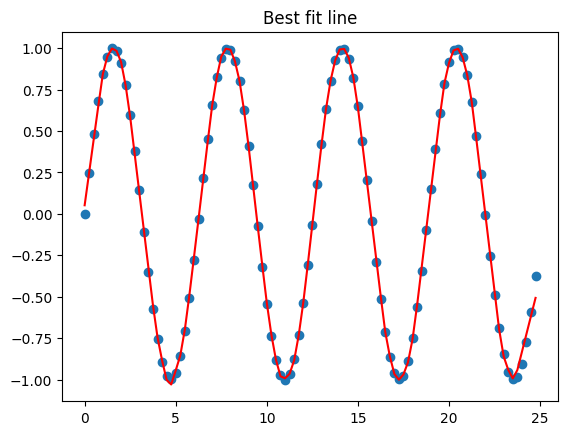

In [48]:
def train_neural_network_adam(x, y, num_hidden_layers):
    epochs = 1000
    learning_rate = 0.01

    model = NeuralNetwork(num_hidden_layers)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Normalize the data.
    # This helps training as the model doesn't have to deal with large numbers.
    x_mean, x_std = x.mean(), x.std()
    y_mean, y_std = y.mean(), y.std()

    x = (x - x_mean) / x_std
    y = (y - y_mean) / y_std

    inputs = x.reshape(100, 1)
    labels = y.reshape(100, 1)

    losses = []
    for epoch in range(epochs):
        prediction = model(inputs)
        loss = criterion(prediction, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if epoch % 10 == 0:
            print(f'Epoch {epoch} - Loss: {loss.item()}')

    # De-normalize the data
    x = x * x_std + x_mean
    y = y * y_std + y_mean
    prediction = prediction * y_std + y_mean

    # Plot the loss in
    plt.plot(losses, label='Loss')
    plt.title('Loss')
    plt.show()

    # Plot the best fit line along with the data
    plt.scatter(x, y, label='Data')
    plt.plot(x, prediction.detach().numpy(), label='Best fit line', color='red')
    plt.title('Best fit line')
    plt.show()

train_neural_network_adam(sin_x, sin_y, 10)
train_neural_network_adam(sin_x, sin_y, 100)
train_neural_network_adam(sin_x, sin_y, 1000)